<table style="width: 100%; border-style: none;">
<tr style="border-style: none">
<td style="border-style: none; width: 1%; font-size: 16px">Institut f&uuml;r Theoretische Physik<br /> Universit&auml;t zu K&ouml;ln</td>
<td style="border-style: none; width: 1%; font-size: 16px">&nbsp;</td>
<td style="border-style: none; width: 1%; text-align: right; font-size: 16px">Prof. Dr. Simon Trebst<br />Peter Br&ouml;cker</td>
</tr>
</table>
<hr>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">Computerphysik</h1>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">&Uuml;bungsblatt 8</h1>
<hr>
<h3 style="font-weight:bold; text-align: center; margin: 0px; padding:0px; margin-bottom: 20px;">Sommersemester 2016</h3>

<p>**Website:** [http://www.thp.uni-koeln.de/trebst/Lectures/2016-CompPhys.shtml](http://www.thp.uni-koeln.de/trebst/Lectures/2016-CompPhys.shtml)</p>

<p>**Abgabe**: Montag, 13. Juni, 2016 vor der Vorlesung</p>

<p>**Name**: <font color="red">Anna Dmitrieva</font></p>

<p>**Matrikelnummer**: <font color="red">4835980</font></p><br />


<table style="border-style: none; width: 100%; margin-top: 20px; padding: 0px;"
><tr style="border-style: none; margin: 0px; padding: 0px;">
<td style="border-style: none; width: 80%; margin: 0px; padding: 0px; font-size: 20px; font-weight: bold">Allerlei aus dem Potentialtopf</td>
<td style="border-style: none; width: 20%; margin: 0px; padding: 0px; text-align: right">(5 Punkte)</td></tr></table>

In unserem ersten Beispiel wollen wir ein quantenmechanisches Teilchen verfolgen, welches wir nicht nur in eine Raumdimension zwängen sondern auch noch in einen sogenannten **Potentialtopf** sperren. Eine derartige Situation lässt sich dann durch die *zeitunabhängige* Schrödinger-Gleichung in einer Dimension

\begin{equation}
\left[-\frac{1}{2}\frac{d^2}{d x^2} + V(x)\right]\psi(x) = E\psi(x) \,,
\end{equation}

beschreiben, wobei wir $\hbar=m=1$ gesetzt haben. Beachten Sie, dass es sich hierbei um eine *gewöhnliche* Differentialgleichung handelt.

Diese Schrödinger-Gleichung wollen wir nun für verschiedene Potentiale $V(x)$ - etwa jene, die in der Abbildung dargestellt sind - anhand des in der Vorlesung vorgestellten **Numerov-Algorithmus** numerisch exakt 
lösen.

**Potentialtöpfe**

Dazu können wir wie folgt vorgehen: Wir diskretisieren die $x$-Achse im Bereich -$1.0 \leq x \leq 1.0$ in 1000 Abschnitte der
Größe $\Delta x = 0.002$. Des weiteren benötigen wir für das Numerov-Verfahren, in welchem wir die Schrödinger-Gleichung vom linken zum rechten Rand entlang der obigen Diskretisierungsschritte integrieren wollen, zwei Startwerte.

Dazu vergegenwärtigen wir uns zum einen, dass die Wellenfunktion an den Rändern des Potentialtopfes wegen der unendlich hohen Wände verschwinden muss, wohingegen die Wellenfunktion innerhalb des Potentialtopfes durchaus einen endlichen Wert annehmen kann. Dies wollen wir mit den folgenden Startwerten des Numerov-Verfahrens in der Nähe des linken Randes wie folgt modellieren:

\begin{align}
\psi(x = -1.000) &= 0 \,, \\
\psi(x = -0.998) &= 0.5 \,,
\end{align}

wobei die exakte Wahl des endlichen Wertes für $\psi(x = -0.998)$ unerheblich ist, da wir die Wellenfunktion nach **Integration** durch das **Numerov-Verfahren** unabhänging von dieser Wahl normieren müssen.

<img src="http://www.thp.uni-koeln.de/trebst/Lectures/CompPhys-2016/08_potentiale.png" width="80%"/>

#### Aufgaben

Führen Sie die Numerov-Integration für die dargestellten Potentiale und verschiedene fixe Energien $E$ aus, also zum Beispiel für 250 äquidistante Energiewerte im Bereich $-5 \leq E \leq 95$ und plotten Sie jeweils den Wert von $\psi(x = +1)$ als Funktion der Energie.

Die Nullstellen dieser Funktion entsprechen den erlaubten Eigenenergien, denn nur dann wird auch die Randbedingung am *rechten* Rand erfüllt, wo die Wellenfunktion ebenfalls verschwinden muss, d.h. $\psi(x = +1) = 0$.

In [358]:
#Konstanten
h = 0.002
a = h^2/12

#Orte
x0 = 1.0
x = linspace(-1.0,1.0,1000)
n = length(x)
psi = zeros(n)


#Energieachse y(x)
E = linspace(-5,95,250)

#Potential
V0(x) = 0.0
V1(x) = -0.5*x
function V2(x)
V = zeros(n)
V3 = -10
V[51:101] =  V3
V[121:271] = V3
V[371:421] = V3
V[521:571] = V3
V[671:721] = V3
V[821:871] = V3
V[971:1000] = V3

end



#Randbedingung
psi[1] = 0
psi[2] = 0.5
psi[end] = 0


0

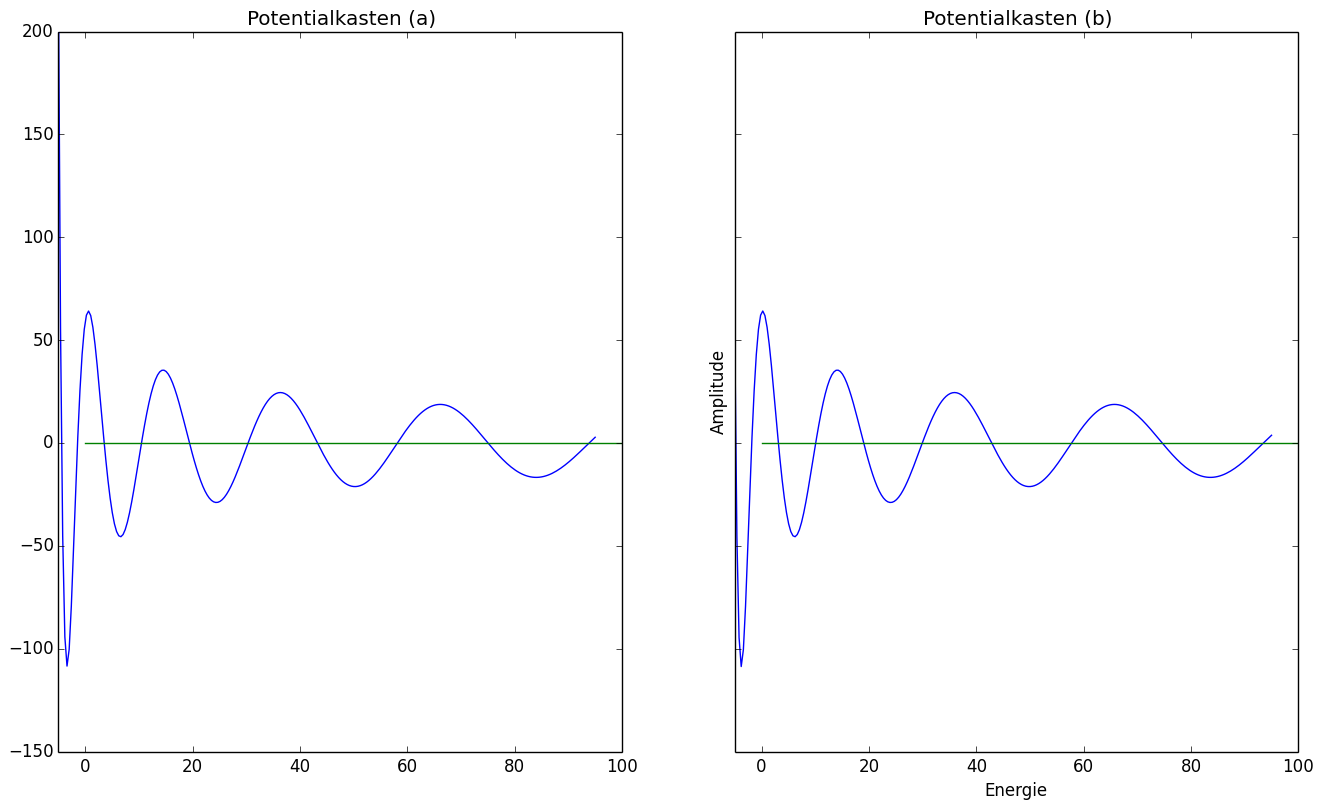

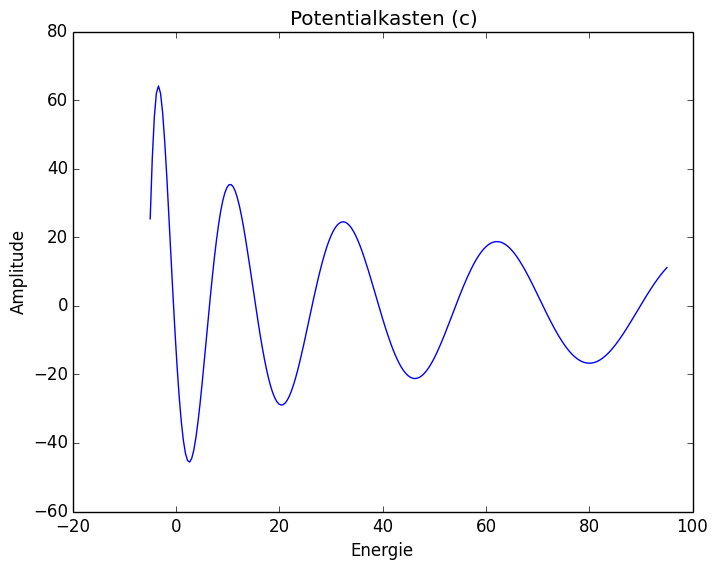

PyPlot.Figure(PyObject <matplotlib.figure.Figure object at 0x33a6c9610>)

In [368]:
#Definiere Numerov-Algorithmus als Funktion

function numerov(E,V)
    psi_value = []
    for i in 1:length(E)
        for j in 2:n-1
        k0 = i - V(x0+j*h)   #k ädert sich mit Energie
        k1 = i - V(x0+(j-1)*h)
        k2 = i - V(x0+(j+1)*h)
    
        psi[j+1] = (2*(1-5*a*k0)*psi[j]  - (1+a*k1)*psi[j-1])/(1+a*k2) 
        end 
        push!(psi_value,psi[n])    
    end
    return(psi_value)
end


#Plot
using PyPlot


fig, ax = subplots(1, 2, sharex=true, sharey=true, figsize=(16,9))
xlabel("Energie");
ylabel("Amplitude");
ax[1][:plot](E,numerov(E,V0))
ax[1][:plot](zeros(E), color="green")
ax[1][:set_title]("Potentialkasten (a)")

ax[2][:plot](E,numerov(E,V1))
ax[2][:set_title]("Potentialkasten (b)")
ax[2][:plot](zeros(E), color="green")
xlim(-5,100)
ylim(-150,200)
figure()

plot(E,numerov(E,V2))

title("Potentialkasten (c)")
xlabel("Energie")
ylabel("Amplitude")
figure()



